* Ref: https://www.pik-potsdam.de/members/franke/lecture-sose-2016/introduction-to-python.pdf

## Solving ordinary differential equations

* Lotka-Volterra model:

$\frac{dx}{dt} = \alpha x - \beta x y$

$\frac{dy}{dt} = \delta x y - \gamma y$


[[1.         1.        ]
 [1.01004492 1.01528124]
 [1.02015897 1.03110807]
 ...
 [0.24040733 0.87039675]
 [0.24289055 0.86367002]
 [0.24540269 0.85705957]]


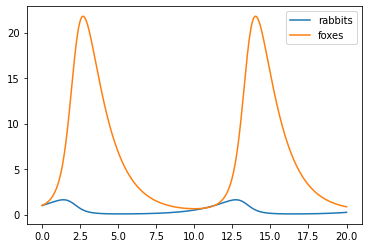

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE
def LotkaVolterra(y, t, parameters):
    # parameters: [\alpha, \beta, \delta, \gamma]
    # y: [x, y]
    return [parameters[0] * y[0] - parameters[1] * y[0] * y[1],
            parameters[2] * y[0] * y[1] - parameters[3] * y[1]]

# parameter values
p = [0.6, 0.1, 1.5, 0.75]

# initial conditions
y0 = [1.0, 1.0]

# times for integration
t = np.linspace(0, 20, 1000)

# solve the ODE
res = odeint(LotkaVolterra, y0, t, args=(p, ))
print(res)

# plot the results
plt.plot(t, res[:, 0], label='rabbits')
plt.plot(t, res[:, 1], label='foxes')
plt.legend()
plt.show()

## Solving stochastic differential equation

$dx_{t} = a(x_{t})dt + b(x_{t})dW_{t}$

* $a(x_{t})$: drift term
* $b(x_{t})$: diffusion term
* $dW_{t}$: Wiener process


* There is stochastic noise in real world applications
  * Especially in a non-linear, multi-scale system
* The SDE can numerically be solved using the Euler-Maruyama schema
  * Solve for each time step $Y_n = Y_{n-1} + a(Y_{n-1})\Delta t + b(Y_{n-1}) \Delta W$
    * $N(0, \Delta t)$
    
### Ornstein-Uhlenbeck process: $dx_{t} = \theta(\mu - x_{t}) dt + \sigma dW_{t}$

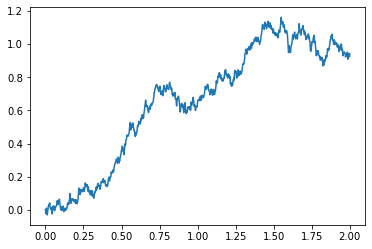

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define model parameters
t_0 = 0
t_end = 2
length = 1000
theta = 1.1
mu = 0.8
sigma = 0.3

# Define time axis
t = np.linspace(t_0, t_end, length)
dt = np.mean(np.diff(t))

y = np.zeros(length)
# initial condition
y0 = np.random.normal(loc=0.0, scale=1.0)

# Define drift term and diffusion term
drift = lambda y, t: theta * (mu - y)
diffusion = lambda y, t: sigma
# Define noise process
noise = np.random.normal(loc=0.0, scale=1.0, size=length) * np.sqrt(dt)

# solve SDE
for i in range(1, length):
    y[i] = y[i - 1] + drift(y[i - 1], i*dt)*dt + diffusion(y[i - 1], i*dt)*noise[i]
    
plt.plot(t, y)
plt.show()